# Análise Bivariada e Multivariada das features fora do ambiente escolar
As features selecionadas são relacionadas ao comportamento dos estudantes fora do ambiente escolar e ao ambiente social e familiar. Elas refletem aspectos do estilo de vida, atividades extracurriculares, consumo de álcool e relacionamentos. <br>
Features escolhidas:<br>

- Famrel: Relação com a família, medida de qualidade das relações familiares.<br>
- Activities: Participação em atividades extracurriculares fora da escola.<br>
- Goout: Frequência de saídas para eventos sociais ou recreativos.<br>
- Freetime: Tempo disponível para lazer e atividades pessoais.<br>
- Dalc: Frequência de consumo de álcool durante a semana (dias da semana).<br>
- Walc: Frequência de consumo de álcool nos finais de semana.<br>
- Romantic: Estado de relacionamento romântico (se o estudante está ou não em um relacionamento).<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

d1_trabalhado = pd.read_csv("d1_trabalhado.csv", sep=",")

In [4]:
features_ext_behav =  [
    'famrel', 'activities', 'goout', 'freetime',
    'Dalc', 'Walc', 'romantic'
]

d1_features_ext_behav = features_ext_behav + ['G1', 'G2', 'G3']

## Analisando em relação à G3

In [5]:
# usando correlação de Pearson
correlation_matrix_pearson = d1_trabalhado[d1_features_ext_behav].corr()
correlation_with_g3 = correlation_matrix_pearson['G3'].sort_values(ascending=False)

print(correlation_with_g3)

G3            1.000000
G2            0.904868
G1            0.801468
famrel        0.051363
activities    0.016100
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
romantic     -0.129970
goout        -0.132791
Name: G3, dtype: float64


In [7]:
# usando correlação de Spearman
correlation_matrix_spearman = d1_trabalhado[d1_features_ext_behav].corr(method='spearman')
correlation_with_g3_spearman = correlation_matrix_spearman['G3'].sort_values(ascending=False)

print(correlation_with_g3_spearman)

G3            1.000000
G2            0.957125
G1            0.878001
famrel        0.054977
activities    0.026090
freetime     -0.004994
romantic     -0.091460
Walc         -0.104459
Dalc         -0.120944
goout        -0.166119
Name: G3, dtype: float64


> Features que sobressaem: <br>
Correlação negativa: 
goout, Dalc

- goout: pode indicar que à medida que a frequência com que um estudante sai para eventos sociais aumenta, suas notas tendem a diminuir. Isso pode indicar que estudantes que passam mais tempo fora de casa para eventos sociais podem estar dedicando menos tempo ao estudo, o que impacta negativamente seu desempenho acadêmico.
- Dalc: A correlação negativa entre Dalc (frequência de consumo de álcool durante a semana) e G3 sugere que um maior consumo de álcool durante a semana está associado a notas mais baixas.


## Analisando os subtargets

### G1

In [8]:
correlation_with_g1 = correlation_matrix_pearson['G1'].sort_values(ascending=False)
print(correlation_with_g1)

G1            1.000000
G2            0.852118
G3            0.801468
activities    0.057010
famrel        0.022168
freetime      0.012613
romantic     -0.037188
Dalc         -0.094159
Walc         -0.126179
goout        -0.149104
Name: G1, dtype: float64


In [9]:
correlation_with_g1_spearman = correlation_matrix_spearman['G1'].sort_values(ascending=False)
print(correlation_with_g1_spearman)

G1            1.000000
G2            0.894792
G3            0.878001
activities    0.056314
famrel        0.026433
freetime      0.006973
romantic     -0.015925
Walc         -0.108368
Dalc         -0.111438
goout        -0.151636
Name: G1, dtype: float64


> Features que sobressaem:
- Correlação negativa: 
goout

### G2

In [11]:
correlation_with_g2 = correlation_matrix_pearson['G2'].sort_values(ascending=False)
print(correlation_with_g2)

G2            1.000000
G3            0.904868
G1            0.852118
activities    0.050552
freetime     -0.013777
famrel       -0.018281
Dalc         -0.064120
Walc         -0.084927
romantic     -0.111774
goout        -0.162250
Name: G2, dtype: float64


In [12]:
correlation_with_g2_spearman = correlation_matrix_spearman['G2'].sort_values(ascending=False)
print(correlation_with_g2_spearman)

G2            1.000000
G3            0.957125
G1            0.894792
activities    0.050743
famrel        0.008165
freetime     -0.016765
romantic     -0.084542
Walc         -0.109144
Dalc         -0.110086
goout        -0.160985
Name: G2, dtype: float64


- Novamente, as features que mais podem indicar notas melhores ou piores são: goout e Dalc. 

### Explorando visualmente as features mais relevantes


In [29]:
import pandas as pd

# Categorizar G3 em intervalos
def categorize_g3(value):
    if value < 10:
        return 'Low'
    elif 10 <= value < 15:
        return 'Medium'
    else:
        return 'High'

d1_trabalhado['G3_cat'] = d1_trabalhado['G3'].apply(categorize_g3)


G3_cat              High  Low  Medium
Dalc_cat Goout_cat                   
High     High          3   15      19
         Low           0    0       1
         Medium        0    1       5
Low      High         35   58      82
         Low           5    6       9
         Medium       21   19      41
Medium   High          5   27      25
         Low           0    0       2
         Medium        4    4       8


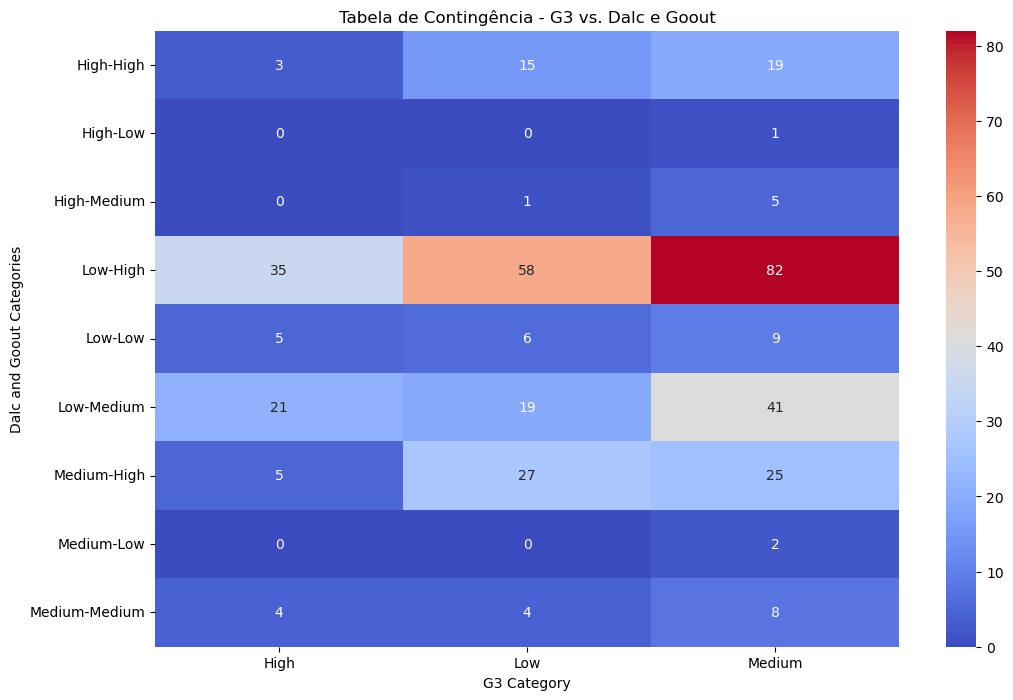

In [32]:
# Categorizar Dalc e Goout
def categorize_dalc(value):
    if value == 1:
        return 'Low'
    elif value == 2:
        return 'Medium'
    else:
        return 'High'

def categorize_goout(value):
    if value == 1:
        return 'Low'
    elif value == 2:
        return 'Medium'
    else:
        return 'High'

d1_trabalhado['Dalc_cat'] = d1_trabalhado['Dalc'].apply(categorize_dalc)
d1_trabalhado['Goout_cat'] = d1_trabalhado['goout'].apply(categorize_goout)

# Criar a tabela de contingência com G3
contingency_table = pd.crosstab(index=[d1_trabalhado['Dalc_cat'], d1_trabalhado['Goout_cat']], 
                               columns=d1_trabalhado['G3_cat'])
print(contingency_table)

# Criar o gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=True)

plt.title('Tabela de Contingência - G3 vs. Dalc e Goout')
plt.xlabel('G3 Category')
plt.ylabel('Dalc and Goout Categories')
plt.show()

A tabela de contingência indica que quem tem nota 'high' (maior que 15), em sua maioria (35) tem um low Dalc e um high goout. Seguidamente, 21 estudantes que tiram notas maiores (high), possuem Dalc low e goout medium. Somente 3 estudantes indicaram que saem bastante (goout high) e bebem mais (dalc high). <br>
No geral, ambos não possuem tanta influência assim em G3.